In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv"


In [4]:
df = pd.read_csv(url)
df.sample(3)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
1426,paid_ads,healthcare,0,NaN,student,europe,5,0.18,0
1406,organic_search,retail,1,NaN,student,asia,4,0.47,1
150,events,healthcare,2,84672.0,self_employed,NaN,3,0.76,1


In [5]:
df.sample(3, random_state=42)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
892,social_media,manufacturing,2,56070.0,self_employed,middle_east,2,0.23,1
1106,NaN,other,1,78409.0,NaN,australia,4,0.79,0
413,referral,manufacturing,2,66206.0,employed,australia,3,0.30,1


In [48]:
df.shape

(1462, 9)

In [9]:
# T to check the transpose
df.sample().T

,32
lead_source,referral
industry,NaN
number_of_courses_viewed,5
annual_income,43704.0
employment_status,employed
location,australia
interaction_count,4
lead_score,0.26
converted,1


In [10]:
df.info

<bound method DataFrame.info of          lead_source       industry  number_of_courses_viewed  annual_income  \
0           paid_ads            NaN                         1        79450.0   
1       social_media         retail                         1        46992.0   
2             events     healthcare                         5        78796.0   
3           paid_ads         retail                         2        83843.0   
4           referral      education                         3        85012.0   
...              ...            ...                       ...            ...   
1457        referral  manufacturing                         1            NaN   
1458        referral     technology                         3        65259.0   
1459        paid_ads     technology                         1        45688.0   
1460        referral            NaN                         5        71016.0   
1461  organic_search        finance                         3        92855.0   

     em

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


In [11]:
# Checking data types
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [12]:
# Checking missing values
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

## Data preparation
Check if the missing values are presented in the features.
If there are missing values:
For caterogiral features, replace them with 'NA'

For numerical features, replace with with 0.0

In [13]:
df.nunique()

lead_source                    5
industry                       7
number_of_courses_viewed      10
annual_income               1267
employment_status              4
location                       7
interaction_count             12
lead_score                   101
converted                      2
dtype: int64

In [14]:
# Defining numerical and categorical variables
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']
categorical = ['lead_source', 'industry', 'employment_status', 'location']

In [15]:
# Replacing numerical missing values with 0.0
df[numerical] = df[numerical].fillna(0.0)
df[numerical]

,number_of_courses_viewed,annual_income,interaction_count,lead_score
0,1,79450.0,4,0.94
1,1,46992.0,1,0.80
2,5,78796.0,3,0.69
3,2,83843.0,1,0.87
4,3,85012.0,3,0.62
...,...,...,...,...
1457,1,0.0,4,0.53
1458,3,65259.0,2,0.24
1459,1,45688.0,3,0.02
1460,5,71016.0,0,0.25


In [16]:
# Number of missing values, percentage of missing values and data types
pd.DataFrame(
    {
        "missing_values": df.isnull().sum(),
        "missing_%": round(df.isnull().mean() * 100, 2),
        "types": df.dtypes,
    }
)

,missing_values,missing_%,types
lead_source,128,8.76,object
industry,134,9.17,object
number_of_courses_viewed,0,0.00,int64
annual_income,0,0.00,float64
employment_status,100,6.84,object
location,63,4.31,object
interaction_count,0,0.00,int64
lead_score,0,0.00,float64
converted,0,0.00,int64


In [17]:
# List of numerical and categorical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include="object").columns.tolist()

In [18]:
# Fill missing values
df[numerical_features] = df[numerical_features].fillna(0)
df[categorical_features] = df[categorical_features].fillna("NA")

In [19]:
# Checking the number of missing values, percentage of missing values and data types after prep
pd.DataFrame(
    {
        "missing_values": df.isnull().sum(),
        "missing_%": round(df.isnull().mean() * 100, 2),
        "types": df.dtypes,
    }
)

,missing_values,missing_%,types
lead_source,0,0.0,object
industry,0,0.0,object
number_of_courses_viewed,0,0.0,int64
annual_income,0,0.0,float64
employment_status,0,0.0,object
location,0,0.0,object
interaction_count,0,0.0,int64
lead_score,0,0.0,float64
converted,0,0.0,int64


## Question 1: Mode for Industry
What is the most frequent observation (mode) for the column industry?

* NA
* technology
* healthcare
* retail

In [21]:
# Mode of the industry feature
print(f"Mode of the industry feature: {df.industry.mode().values[0]}")

Mode of the industry feature: retail


In [22]:
# or
df.industry.mode()

0    retail
Name: industry, dtype: object

#### Answer Q1: retail

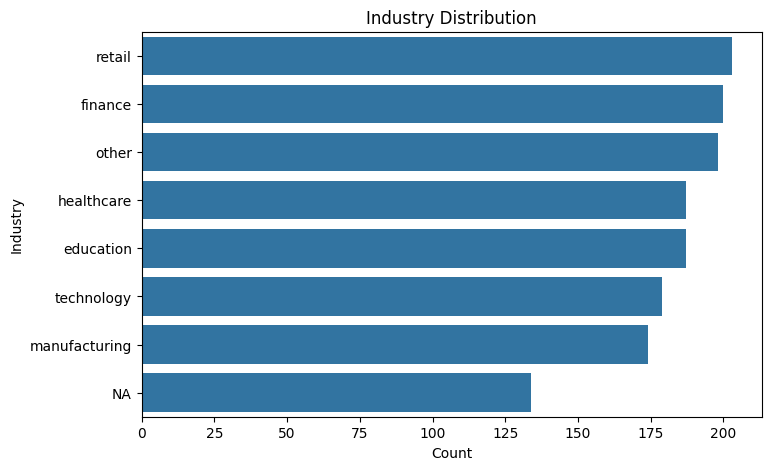

In [26]:
# Distribution of the industry feature
plt.figure(figsize=(8, 5))
sns.barplot(x=df.industry.value_counts().values, y=df.industry.value_counts().index)
plt.title("Industry Distribution")
plt.xlabel("Count")
plt.ylabel("Industry")
plt.show()

## Question 2. Biggest Correlation


Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

* interaction_count and lead_score

* number_of_courses_viewed and lead_score

* number_of_courses_viewed and interaction_count

* annual_income and interaction_count



Only consider the pairs above when answering this question. Split the data



Split your data in train/val/test sets with 60%/20%/20% distribution.

Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

Make sure that the target value y is not in your dataframe.

In [28]:
# Calculating correlation between numerical values
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


#### Answer Q2: annual_income and interaction_count (0.027036)


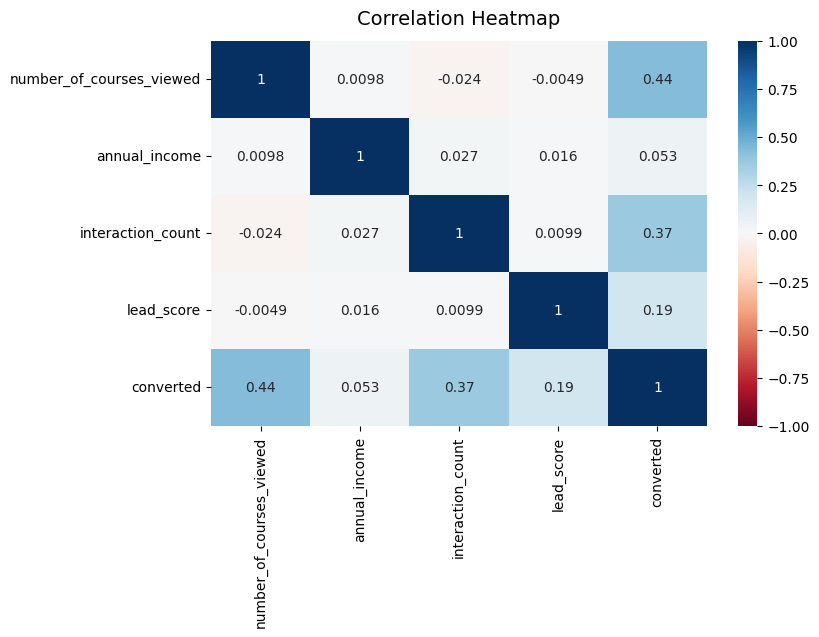

In [31]:
# Correlation heatmap
plt.figure(figsize=(8, 5))

heatmap = sns.heatmap(
    df[numerical_features].corr(method="pearson"),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap=sns.color_palette("RdBu", as_cmap=True),
)

heatmap.set_title("Correlation Heatmap", fontdict={"fontsize": 14}, pad=12);

## Preparing the data for modeling

In [33]:
# Spliting data into train/val/test sets with 60%/20%/20% distribution.
# Using Scikit-Learn for (the train_test_split function) and setting the seed to 42.
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [34]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [35]:
# Reseting the index of datasets
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [36]:
# Defining what values we need to predict
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

In [38]:
# Make sure that the target value y is not in the dataframe.
# Deleting the value to predict to avoid using it in the model
del df_train['converted']
del df_val['converted']
del df_test['converted']

## Question 3: Biggest Mutual Information Score

Calculate the mutual information score between converted and other categorical variables in the dataset. Use the training set only.
Round the scores to 2 decimals using round(score, 2).

Which of these variables has the biggest mutual information score?

* industry

* location

* lead_source

* employment_status

In [37]:
# Importing a function from SciKit learn that implements Mutual Information
from sklearn.metrics import mutual_info_score

In [39]:
# Creating the function to learn which ones are more important
def mutual_info_converted_score(series):
    return mutual_info_score(series, y_train)

In [41]:
# Calculating the mutual information score between y and other categorical variables in the dataset.
# Using the training set only.
mi = df_train[categorical].apply(mutual_info_converted_score)
mi.sort_values(ascending=False)

lead_source          0.035396
employment_status    0.012938
industry             0.011575
location             0.004464
dtype: float64

In [90]:
print(
    f"The biggest mutual information score is {mi.max():.3f} for the feature, {mi.idxmax()}"
)

The biggest mutual information score is 0.035 for the feature, lead_source


#### Answer Q3: lead_score (0.035)


## Question 4. Accuracy

* Now let's train a logistic regression.

* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    * model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
    

    What accuracy did you get?

* 0.64
* 0.74
* 0.84
* 0.94

In [55]:
# Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.

# Train dataset
dv = DictVectorizer(sparse=False)
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

# Test dataset
test_dicts = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dicts)


# Validation dataset
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [56]:
X_train.shape, X_test.shape, X_val.shape


((876, 31), (293, 31), (293, 31))

In [47]:
# Fit the model on the training dataset. 

# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [57]:
model.intercept_


array([-0.06914728])

In [58]:
model.coef_.round(3)


array([[-0.   , -0.015,  0.034,  0.003,  0.012, -0.103, -0.025,  0.049,
        -0.02 , -0.013, -0.003, -0.009, -0.032, -0.016,  0.311,  0.051,
         0.02 , -0.012, -0.012, -0.115,  0.08 , -0.03 ,  0.004, -0.011,
        -0.011, -0.006,  0.008,  0.006, -0.033, -0.025,  0.454]])

In [59]:
y_pred = model.predict_proba(X_val)[:, 1]
converted_decision = y_pred >= 0.5

In [63]:
# Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
# Predict based on a chosen threashold
accuracy = (converted_decision == y_val).mean().round(2)
accuracy

np.float64(0.7)

#### Answer Q4: 0.7

## Question 5. Feature selection

* Let's find the least useful feature using the feature elimination technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

    
    Which of following feature has the smallest difference?

* 'industry'
* 'employment_status'
* 'lead_score'


| Note: The difference doesn't have to be positive.

In [64]:
df_train.columns

Index(['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score'],
      dtype='object')

In [65]:
# Setting datasets
no_industry = ['lead_source', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count', 'lead_score']
no_employment_status = ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'location', 'interaction_count', 'lead_score']
no_lead_score = ['lead_source', 'industry', 'number_of_courses_viewed', 'annual_income',
       'employment_status', 'location', 'interaction_count']

In [74]:
# No industry
dv_industry = DictVectorizer(sparse=False)
dicts_train_industry = df_train[no_industry].to_dict(orient='records')
dicts_val_industry = df_val[no_industry].to_dict(orient='records')

X_train_industry = dv_industry.fit_transform(dicts_train_industry)
X_val_industry = dv_industry.transform(dicts_val_industry)

# Train model
model_industry = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_industry.fit(X_train_industry, y_train)

# Prediction
y_pred_industry = model_industry.predict_proba(X_val_industry)[:, 1]
converted_industry = (y_pred_industry >= 0.5)

acc_orig = (y_val == converted_industry).mean()

# Accuracy difference
acc_industry = (y_val == converted_industry).mean()
print("Accuracy without industry is", acc_industry)
industry_diff = abs(acc_industry - acc_orig)
print("Difference:", industry_diff)

Accuracy without industry is 0.6996587030716723
Difference: 0.0


In [75]:
# No employment_status
dv_es = DictVectorizer(sparse=False)
dicts_train_es = df_train[no_employment_status].to_dict(orient='records')
dicts_val_es = df_val[no_employment_status].to_dict(orient='records')

X_train_es = dv_es.fit_transform(dicts_train_es)
X_val_es = dv_es.transform(dicts_val_es)

# Train model
model_es = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_es.fit(X_train_es, y_train)

# Prediction
y_pred_es = model_es.predict_proba(X_val_es)[:, 1]
converted_es = (y_pred_es >= 0.5)

acc_orig = (y_val == converted_industry).mean()


# Accuracy difference
acc_es = (y_val == converted_es).mean()
print("Accuracy without employment status is", acc_es)
es_diff = abs(acc_es - acc_orig)
print("Difference:", es_diff)

Accuracy without employment status is 0.6962457337883959
Difference: 0.0034129692832763903


In [77]:
# No lead_score
dv_ls = DictVectorizer(sparse=False)
dicts_train_ls = df_train[no_lead_score].to_dict(orient='records')
dicts_val_ls = df_val[no_lead_score].to_dict(orient='records')

X_train_ls = dv_ls.fit_transform(dicts_train_ls)
X_val_ls = dv_ls.transform(dicts_val_ls)

# Train model
model_ls = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model_ls.fit(X_train_ls, y_train)

# Prediction
y_pred_ls = model_ls.predict_proba(X_val_ls)[:, 1]
converted_ls = (y_pred_ls >= 0.5)

acc_orig = (y_val == converted_industry).mean()
industry_diff = abs(acc_industry - acc_orig)

# Accuracy difference
acc_ls = (y_val == converted_ls).mean()
print("Accuracy without lead score is", acc_ls)
ls_diff = abs(acc_ls - acc_orig)
print("Difference:", ls_diff)

Accuracy without lead score is 0.7064846416382252
Difference: 0.0068259385665528916


In [78]:
print("Answer Q5:", min(industry_diff, es_diff, ls_diff))


Answer Q5: 0.0


## Question 6: Parameter Tuning

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter C: [0.01, 0.1, 1, 10, 100].
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.


    Which of these C leads to the best accuracy on the validation set?

* 0.01

* 0.1

* 1

* 10

* 100

| Note: If there are multiple options, select the smallest C.



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C_values = [0.01, 0.1, 1, 10, 100]
accuracies = {}

for c in C_values:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = round(accuracy_score(y_val, y_pred), 3)
    accuracies[c] = acc

best_c = min([c for c in accuracies if accuracies[c] == max(accuracies.values())])
print("Best C:", best_c)


C:\Users\pc\miniconda3\envs\machine-learning-zoomcamp-homework\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best C: 10


C:\Users\pc\miniconda3\envs\machine-learning-zoomcamp-homework\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Answer Q6: 10